In [3]:
# Load Data
import zipfile
with zipfile.ZipFile('BBC News Summary.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [4]:
def clean_text(text):
    
    text=text.lower()
    text=' '.join([contraction_mapping[i] if i in contraction_mapping.keys() else i for i in text.split()])
    text=re.sub(r'\(.*\)',"",text)
    text=re.sub("'s","",text)
    text=re.sub('"','',text)
    text=' '.join([i for i in text.split() if i.isalpha()])
    text=re.sub('[^a-zA-Z]'," ",text)
    
    return text

#### Articles Business

In [6]:
# tokenization
import nltk
nltk.download('punkt') # one time execution
from nltk.tokenize import sent_tokenize
sentences = []
root='bbc news summary/BBC News Summary/News Articles/business'
for s in business_texts:
  file_ = open(root+'/'+s, "r") 
  business_file=file_.read().replace('\n', '.')
  business_file=business_file.split('.')
  for sent in business_file:
    if sent!='':
      if sent[0].isdigit():
        sentences[-1][0]+=sent_tokenize(sent)[0]
      else:
        sentences.append(sent_tokenize(sent))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
# Print Sentences
sentences

[['India and Iran in gas export deal'],
 ['India has signed a $40bn (£21bn) deal to import millions of tonnes of liquefied natural gas from Iran'],
 ['Firms led by the Oil & Natural Gas Corporation (ONGC) will also assist in the development of Iranian oil fields'],
 [' Ministers, eager to gain access to energy supplies to meet the demands of a booming economy, secured a similar deal to one between Iran and China'],
 [' The announcement comes as ONGC said it was in talks to buy former assets of troubled Russian oil firm Yukos'],
 [" The agreements with Iran were sealed after talks in New Delhi between Middle East producers and Asia's biggest energy consumers - China, India, Japan and South Korea"],
 ["Iran - Opec's second-biggest oil producer and one of the world's top gas producers - has been pursuing a series of deals, rewarding LNG buyers with participation in development of its oil fields"],
 [' Under the agreement, it will supply India with 75 million tonnes of LPG annually over a 

In [8]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2020-12-08 02:03:31--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-12-08 02:03:31--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-12-08 02:03:32--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [10]:
import re
clean_sentences = []
ind=0
while ind < len(sentences):
  i=sentences[ind]
  regex = re.compile('[^a-zA-Z]')
  if len(i)!=0:
    clean_sentences.append(regex.sub(' ', i[0]))
    ind+=1
  else:
    del sentences[ind]

clean_sentences = [s.lower() for s in clean_sentences]

In [11]:
stop_words= ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'between',
 'into',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'other',
 'some',
 'such',
 'only',
 'own',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'now',
 'm',
 'd',
 'll',
 'could',
 'would',
 'more',
 'also',
 'said',
 'mr',
 'however',
 'may']

In [11]:
# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [12]:
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [13]:
# Extract word vectors
import numpy as np
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [15]:
import pandas as pd
business_words={}
for i in clean_sentences:
  if len(i)!=0:
    for w in i.split():
      if w not in business_words:
        business_words[w]=1
      else:
        business_words[w]+=1
        
bs_words=pd.DataFrame.from_dict({'words':list(business_words.keys()),'counts':list(business_words.values()) })
bs_words=bs_words.set_index('words')

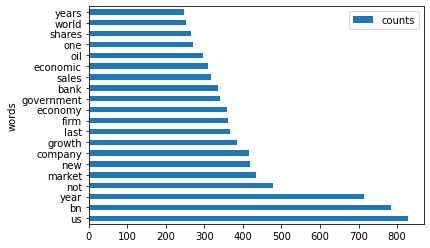

In [16]:
top_twenty=bs_words.nlargest(20, ['counts'])
ax = top_twenty.plot.barh(x=None, y='counts', rot=0)

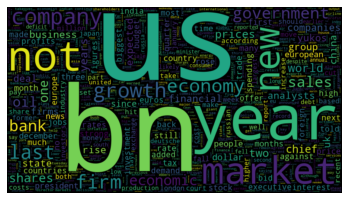

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(business_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(np.array(v))

sentence_vectors=np.array(sentence_vectors)

In [19]:
def cosine_similarities(mat):
  norm = (mat.T * mat.T).sum(0, keepdims=True) ** .5
  return (mat @ mat.T ) / norm.T / norm 

sim_mat=cosine_similarities(sentence_vectors)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
from scipy import sparse
sim_mat[sim_mat < 0.9]=0
for i in range(8684):
  sim_mat[i,i] = 0
sim_mat[np.isnan(sim_mat)] =0
sparse_mat = sparse.csr_matrix(sim_mat)
sparse_mat.eliminate_zeros()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


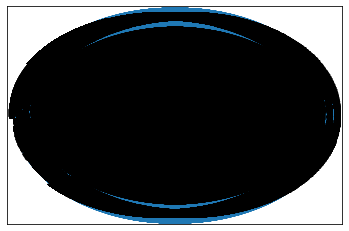

In [21]:
import networkx as nx
SimilarityGraph = nx.from_scipy_sparse_matrix(sparse_mat)
#print the graph
nx.draw_networkx(SimilarityGraph,pos=nx.shell_layout(SimilarityGraph), with_labels=True)

**Articles Sport**

In [36]:
# tokenization
import nltk
nltk.download('punkt') # one time execution
from nltk.tokenize import sent_tokenize
sentences = []
root='bbc news summary/BBC News Summary/News Articles/sport'
for s in sport_texts:
  file_ = open(root+'/'+s, "r", encoding= 'unicode_escape') 
  sport_file=file_.read().replace('\n', '.')
  sport_file=sport_file.split('.')
  for sent in sport_file:
    if sent!='':
      if sent[0].isdigit():
        sentences[-1][0]+=sent_tokenize(sent)[0]
      else:
        sentences.append(sent_tokenize(sent))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
# Print Sentences
sentences

[["O'Connor aims to grab opportunity"],
 ["Johnny O'Connor is determined to make a big impression when he makes his RBS Six Nations debut for Ireland against Scotland on Saturday"],
 ["The Wasps flanker replaces Denis Leamy but O'Connor knows that the Munster man will be pushing hard for a recall for the following game against England"],
 [' "It\'s a \'horses for courses\' selection really," said O\'Connor'],
 [' "There\'s a lot of competition here and I can\'t just drag my heels around if I don\'t get picked'],
 ['" It looks a definite head-to-head battle between himself and 23-year-old Leamy - three stone heavier than O\'Connor - for the number seven role against the world champions'],
 [" Nonetheless, all O'Connor is currently concerned about is making an impression while winning his third cap"],
 ['"Missing the Italian game was disappointing certainly, but you can\'t dwell on these things - it\'s part and parcel of rugby'],
 [' "Denis has been playing really well and deserved his o

In [40]:
import re
clean_sentences = []
ind=0
while ind < len(sentences):
  i=sentences[ind]
  regex = re.compile('[^a-zA-Z]')
  if len(i)!=0:
    clean_sentences.append(regex.sub(' ', i[0]))
    ind+=1
  else:
    del sentences[ind]

clean_sentences = [s.lower() for s in clean_sentences]

In [41]:
stop_words= ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'between',
 'into',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'other',
 'some',
 'such',
 'only',
 'own',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'now',
 'm',
 'd',
 'll',
 'could',
 'would',
 'more',
 'also',
 'said',
 'mr',
 'however',
 'may']

In [42]:
# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [43]:
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [44]:
# Extract word vectors
import numpy as np
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [45]:
import pandas as pd
sport_words={}
for i in clean_sentences:
  if len(i)!=0:
    for w in i.split():
      if w not in sport_words:
        sport_words[w]=1
      else:
        sport_words[w]+=1
        
sp_words=pd.DataFrame.from_dict({'words':list(sport_words.keys()),'counts':list(sport_words.values()) })
sp_words=sp_words.set_index('words')

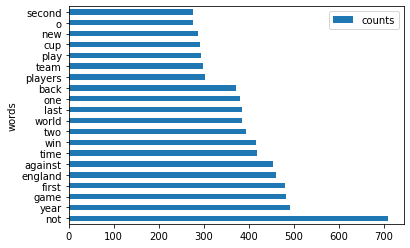

In [46]:
top_twenty=sp_words.nlargest(20, ['counts'])
ax = top_twenty.plot.barh(x=None, y='counts', rot=0)

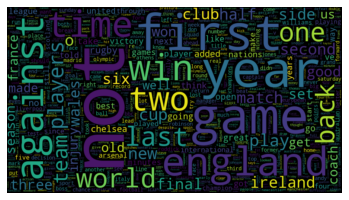

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(sport_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [48]:
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(np.array(v))

sentence_vectors=np.array(sentence_vectors)

In [49]:
def cosine_similarities(mat):
  norm = (mat.T * mat.T).sum(0, keepdims=True) ** .5
  return (mat @ mat.T ) / norm.T / norm 

sim_mat=cosine_similarities(sentence_vectors)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
from scipy import sparse
sim_mat[sim_mat < 0.9]=0
for i in range(8684):
  sim_mat[i,i] = 0
sim_mat[np.isnan(sim_mat)] =0
sparse_mat = sparse.csr_matrix(sim_mat)
sparse_mat.eliminate_zeros()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


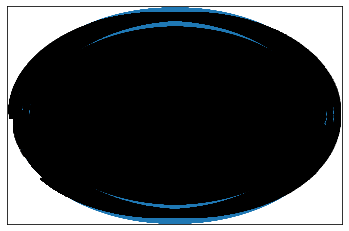

In [51]:
import networkx as nx
SimilarityGraph = nx.from_scipy_sparse_matrix(sparse_mat)
#print the graph
nx.draw_networkx(SimilarityGraph,pos=nx.shell_layout(SimilarityGraph), with_labels=True)

**Articles Politics**

In [119]:
# tokenization
import nltk
nltk.download('punkt') # one time execution
from nltk.tokenize import sent_tokenize
sentences = []
root='bbc news summary/BBC News Summary/News Articles/politics'
for s in politics_texts:
  file_ = open(root+'/'+s, "r") 
  politics_file=file_.read().replace('\n', '.')
  politics_file=politics_file.split('.')
  for sent in politics_file:
    if sent!='':
      if sent[0].isdigit():
        sentences[-1][0]+=sent_tokenize(sent)[0]
      else:
        sentences.append(sent_tokenize(sent))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [120]:
# Print Sentences
sentences

[['Labour plans maternity pay rise'],
 ['Maternity pay for new mothers is to rise by Â£1,400 as part of new proposals announced by the Trade and Industry Secretary Patricia Hewitt'],
 ["It would mean paid leave would be increased to nine months by 2007, Ms Hewitt told GMTV's Sunday programme"],
 [' Other plans include letting maternity pay be given to fathers and extending rights to parents of older children'],
 [' The Tories dismissed the maternity pay plan as "desperate", while the Liberal Democrats said it was misdirected'],
 ['Ms Hewitt said: "We have already doubled the length of maternity pay, it was 13 weeks when we were elected, we have already taken it up to 26 weeks'],
 [' "We are going to extend the pay to nine months by 2007 and the aim is to get it right up to the full 12 months by the end of the next Parliament'],
 ['" She said new mothers were already entitled to 12 months leave, but that many women could not take it as only six of those months were paid'],
 [' "We have 

In [121]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2020-12-18 11:49:45--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu... 171.64.67.140
Connecting to nlp.stanford.edu|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
https://nlp.stanford.edu/data/glove.6B.zip: HTTPS support not compiled in.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [122]:
import re
clean_sentences = []
ind=0
while ind < len(sentences):
  i=sentences[ind]
  regex = re.compile('[^a-zA-Z]')
  if len(i)!=0:
    clean_sentences.append(regex.sub(' ', i[0]))
    ind+=1
  else:
    del sentences[ind]

clean_sentences = [s.lower() for s in clean_sentences]

In [123]:
stop_words= ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'between',
 'into',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'other',
 'some',
 'such',
 'only',
 'own',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'now',
 'm',
 'd',
 'll',
 'could',
 'would',
 'more',
 'also',
 'said',
 'mr',
 'however',
 'may']

In [124]:
# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [125]:
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [126]:
# Extract word vectors
import numpy as np
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [127]:
import pandas as pd
politics_words={}
for i in clean_sentences:
  if len(i)!=0:
    for w in i.split():
      if w not in politics_words:
        politics_words[w]=1
      else:
        politics_words[w]+=1
        
pl_words=pd.DataFrame.from_dict({'words':list(politics_words.keys()),'counts':list(politics_words.values()) })
pl_words=pl_words.set_index('words')

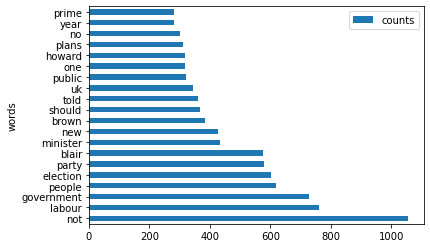

In [128]:
top_twenty=pl_words.nlargest(20, ['counts'])
ax = top_twenty.plot.barh(x=None, y='counts', rot=0)

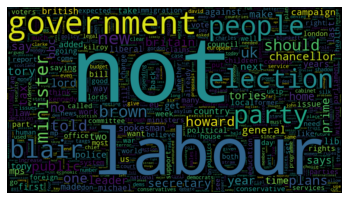

In [129]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(politics_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [130]:
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(np.array(v))

sentence_vectors=np.array(sentence_vectors)

In [131]:
def cosine_similarities(mat):
  norm = (mat.T * mat.T).sum(0, keepdims=True) ** .5
  return (mat @ mat.T ) / norm.T / norm 

sim_mat=cosine_similarities(sentence_vectors)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [132]:
from scipy import sparse
sim_mat[sim_mat < 0.9]=0
for i in range(6777):
  sim_mat[i,i] = 0
sim_mat[np.isnan(sim_mat)] =0
sparse_mat = sparse.csr_matrix(sim_mat)
sparse_mat.eliminate_zeros()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


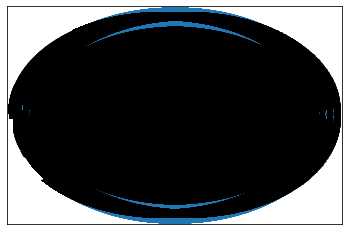

In [133]:
import networkx as nx
SimilarityGraph = nx.from_scipy_sparse_matrix(sparse_mat)
#print the graph
nx.draw_networkx(SimilarityGraph,pos=nx.shell_layout(SimilarityGraph), with_labels=True)

**Articles Tech**

In [64]:
# tokenization
import nltk
nltk.download('punkt') # one time execution
from nltk.tokenize import sent_tokenize
sentences = []
root='bbc news summary/BBC News Summary/News Articles/tech'
for s in tech_texts:
  file_ = open(root+'/'+s, "r") 
  tech_file=file_.read().replace('\n', '.')
  tech_file=tech_file.split('.')
  for sent in tech_file:
    if sent!='':
      if sent[0].isdigit():
        sentences[-1][0]+=sent_tokenize(sent)[0]
      else:
        sentences.append(sent_tokenize(sent))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [66]:
# Print Sentences
sentences

[['Ink helps drive democracy in Asia'],
 ["The Kyrgyz Republic, a small, mountainous state of the former Soviet republic, is using invisible ink and ultraviolet readers in the country's elections as part of a drive to prevent multiple voting"],
 ['This new technology is causing both worries and guarded optimism among different sectors of the population'],
 [' In an effort to live up to its reputation in the 1990s as "an island of democracy", the Kyrgyz President, Askar Akaev, pushed through the law requiring the use of ink during the upcoming Parliamentary and Presidential elections'],
 [' The US government agreed to fund all expenses associated with this decision'],
 ['The Kyrgyz Republic is seen by many experts as backsliding from the high point it reached in the mid-1990s with a hastily pushed through referendum in 2003, reducing the legislative branch to one chamber with 75 deputies'],
 [' The use of ink is only one part of a general effort to show commitment towards more open elec

In [67]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2020-12-18 11:19:48--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu... 171.64.67.140
Connecting to nlp.stanford.edu|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
https://nlp.stanford.edu/data/glove.6B.zip: HTTPS support not compiled in.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [68]:
import re
clean_sentences = []
ind=0
while ind < len(sentences):
  i=sentences[ind]
  regex = re.compile('[^a-zA-Z]')
  if len(i)!=0:
    clean_sentences.append(regex.sub(' ', i[0]))
    ind+=1
  else:
    del sentences[ind]

clean_sentences = [s.lower() for s in clean_sentences]

In [69]:
stop_words= ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'between',
 'into',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'other',
 'some',
 'such',
 'only',
 'own',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'now',
 'm',
 'd',
 'll',
 'could',
 'would',
 'more',
 'also',
 'said',
 'mr',
 'however',
 'may']

In [70]:
# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [71]:
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [72]:
# Extract word vectors
import numpy as np
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [73]:
import pandas as pd
tech_words={}
for i in clean_sentences:
  if len(i)!=0:
    for w in i.split():
      if w not in tech_words:
        tech_words[w]=1
      else:
        tech_words[w]+=1
        
tch_words=pd.DataFrame.from_dict({'words':list(tech_words.keys()),'counts':list(tech_words.values()) })
tch_words=tch_words.set_index('words')

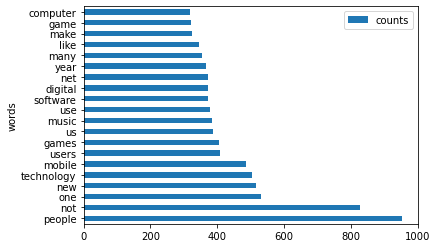

In [76]:
top_twenty=tch_words.nlargest(20, ['counts'])
ax = top_twenty.plot.barh(x=None, y='counts', rot=0)

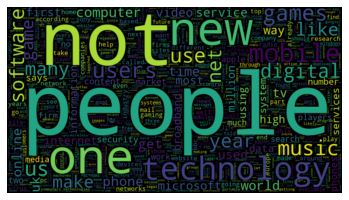

In [79]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(tech_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [80]:
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(np.array(v))

sentence_vectors=np.array(sentence_vectors)

In [81]:
def cosine_similarities(mat):
  norm = (mat.T * mat.T).sum(0, keepdims=True) ** .5
  return (mat @ mat.T ) / norm.T / norm 

sim_mat=cosine_similarities(sentence_vectors)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
from scipy import sparse
sim_mat[sim_mat < 0.9]=0
for i in range(8684):
  sim_mat[i,i] = 0
sim_mat[np.isnan(sim_mat)] =0
sparse_mat = sparse.csr_matrix(sim_mat)
sparse_mat.eliminate_zeros()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


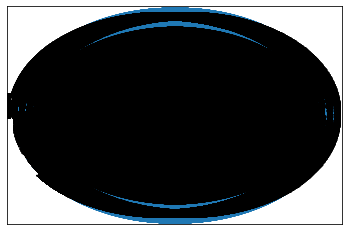

In [83]:
import networkx as nx
SimilarityGraph = nx.from_scipy_sparse_matrix(sparse_mat)
#print the graph
nx.draw_networkx(SimilarityGraph,pos=nx.shell_layout(SimilarityGraph), with_labels=True)

### Artichles Entertainment

In [107]:
# tokenization
import nltk
nltk.download('punkt') # one time execution
from nltk.tokenize import sent_tokenize
sentences = []
root='bbc news summary/BBC News Summary/News Articles/entertainment'
for s in entertainment_texts:
  file_ = open(root+'/'+s, "r") 
  entertainment_file=file_.read().replace('\n', '.')
  entertainment_file=entertainment_file.split('.')
  for sent in entertainment_file:
    if sent!='':
      if sent[0].isdigit():
        sentences[-1][0]+=sent_tokenize(sent)[0]
      else:
        sentences.append(sent_tokenize(sent))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [108]:
# Print Sentences
sentences

[['Gallery unveils interactive tree'],
 ["A Christmas tree that can receive text messages has been unveiled at London's Tate Britain art gallery"],
 ['The spruce has an antenna which can receive Bluetooth texts sent by visitors to the Tate'],
 [' The messages will be "unwrapped" by sculptor Richard Wentworth, who is responsible for decorating the tree with broken plates and light bulbs'],
 [' It is the 17th year that the gallery has invited an artist to dress their Christmas tree'],
 [' Artists who have decorated the Tate tree in previous years include Tracey Emin in 2002'],
 ["The plain green Norway spruce is displayed in the gallery's foyer"],
 [' Its light bulb adornments are dimmed, ordinary domestic ones joined together with string'],
 [" The plates decorating the branches will be auctioned off for the children's charity ArtWorks"],
 [' Wentworth worked as an assistant to sculptor Henry Moore in the late 1960s'],
 [' His reputation as a sculptor grew in the 1980s, while he has bee

In [109]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2020-12-18 11:40:54--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu... 171.64.67.140
Connecting to nlp.stanford.edu|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
https://nlp.stanford.edu/data/glove.6B.zip: HTTPS support not compiled in.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [111]:
import re
clean_sentences = []
ind=0
while ind < len(sentences):
  i=sentences[ind]
  regex = re.compile('[^a-zA-Z]')
  if len(i)!=0:
    clean_sentences.append(regex.sub(' ', i[0]))
    ind+=1
  else:
    del sentences[ind]

clean_sentences = [s.lower() for s in clean_sentences]

In [112]:
stop_words= ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'between',
 'into',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'other',
 'some',
 'such',
 'only',
 'own',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'now',
 'm',
 'd',
 'll',
 'could',
 'would',
 'more',
 'also',
 'said',
 'mr',
 'however',
 'may']

In [113]:
# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [114]:
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [115]:
# Extract word vectors
import numpy as np
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [116]:
import pandas as pd
entertainment_words={}
for i in clean_sentences:
  if len(i)!=0:
    for w in i.split():
      if w not in entertainment_words:
        entertainment_words[w]=1
      else:
        entertainment_words[w]+=1
        
ent_words=pd.DataFrame.from_dict({'words':list(entertainment_words.keys()),'counts':list(entertainment_words.values()) })
ent_words=ent_words.set_index('words')

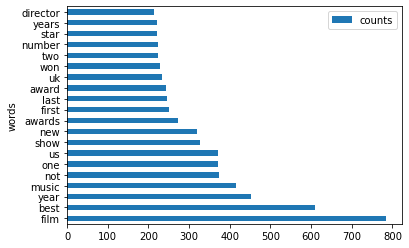

In [117]:
top_twenty=ent_words.nlargest(20, ['counts'])
ax = top_twenty.plot.barh(x=None, y='counts', rot=0)

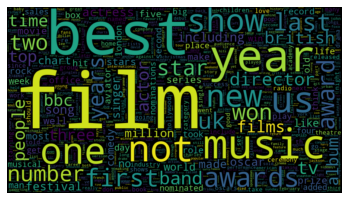

In [118]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(entertainment_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [93]:
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(np.array(v))

sentence_vectors=np.array(sentence_vectors)

In [94]:
def cosine_similarities(mat):
  norm = (mat.T * mat.T).sum(0, keepdims=True) ** .5
  return (mat @ mat.T ) / norm.T / norm 

sim_mat=cosine_similarities(sentence_vectors)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [95]:
from scipy import sparse
sim_mat[sim_mat < 0.9]=0
for i in range(8684):
  sim_mat[i,i] = 0
sim_mat[np.isnan(sim_mat)] =0
sparse_mat = sparse.csr_matrix(sim_mat)
sparse_mat.eliminate_zeros()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


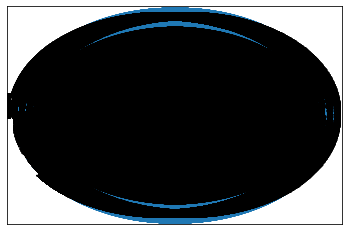

In [96]:
SimilarityGraph = nx.from_scipy_sparse_matrix(sparse_mat)
#print the graph
nx.draw_networkx(SimilarityGraph,pos=nx.shell_layout(SimilarityGraph), with_labels=True)